# 4 - Exploring Weibull


PV ICE handles failures through a probabilistic distribution, so far in specific the Weibull. The Weibull equation is defined by an Alfa and a Beta parameters. These parameters can be found on literature, or they can be calculated if the reliability is known. Altough other values can be set by changing the probabilities, we use by default:

- T50: number of years until 50 % of the modules fail 
- T90: number of years until 90 % of the modules fail
    
Below we show a couple ways of passing the parameters, plot a comparison between different literature values, and highlight the significance of T50 and T90.


In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'Tutorial4')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
import PV_ICE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Working on a  Windows 10
Python version  3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0
PV_ICE version  v0.2.0+553.g11c702b


In [4]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='standard', massmodulefile='baseline_modules_mass_US.csv')
r1.scenario['standard'].addMaterials('glass')


path = C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial4
Baseline folder directed to default:  C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\baselines
No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']
Adding Mass AND Energy files for:  glass


## A. Passing Alpha and Beta values

In [5]:
weibullInputParams = {'alpha': 3.4,
                      'beta': 4.5}
r1.calculateMassFlow(weibullInputParams=weibullInputParams) 
print("\n Weibull Params \n", r1.scenario['standard'].dataOut_m.WeibullParams.head())

>>>> Calculating Material Flows <<<<

Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass

 Weibull Params 
 0    {'alpha': 3.4, 'beta': 4.5}
1    {'alpha': 3.4, 'beta': 4.5}
2    {'alpha': 3.4, 'beta': 4.5}
3    {'alpha': 3.4, 'beta': 4.5}
4    {'alpha': 3.4, 'beta': 4.5}
Name: WeibullParams, dtype: object


## B. Internally calculated Weibull with t50 and t90

In [6]:
r1.calculateMassFlow()  # Note we are not passing weibullInputParams, 
#so it defaults to clculating alpha and beta from the T50 and t90 passed.

print("\n Weibull Params \n", r1.scenario['standard'].dataOut_m.WeibullParams)

>>>> Calculating Material Flows <<<<

Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass

 Weibull Params 
 0     {'alpha': 4.414845594612703, 'beta': 17.384986...
1     {'alpha': 4.414845594612703, 'beta': 17.384986...
2     {'alpha': 6.283760582394805, 'beta': 20.141170...
3     {'alpha': 6.283760582394805, 'beta': 20.141170...
4     {'alpha': 6.283760582394805, 'beta': 20.141170...
5     {'alpha': 6.283760582394805, 'beta': 20.141170...
6     {'alpha': 6.283760582394805, 'beta': 20.141170...
7     {'alpha': 6.283760582394805, 'beta': 20.141170...
8     {'alpha': 6.283760582394805, 'beta': 20.141170...
9     {'alpha': 6.283760582394805, 'beta': 20.141170...
10    {'alpha': 5.138994202457038, 'beta': 20.404571...
11    {'alpha': 5.3801481546698415, 'beta': 21.40994...
12    {'alpha': 5.3801481546698415, 'beta': 21.40994...
13    {'alpha': 5.621212329370306, 'beta': 22.414861...
14    {'alpha': 6.343968929322

### This is what T50, T90 look like for this dataset, and the alpha and beta values resulting for each year.

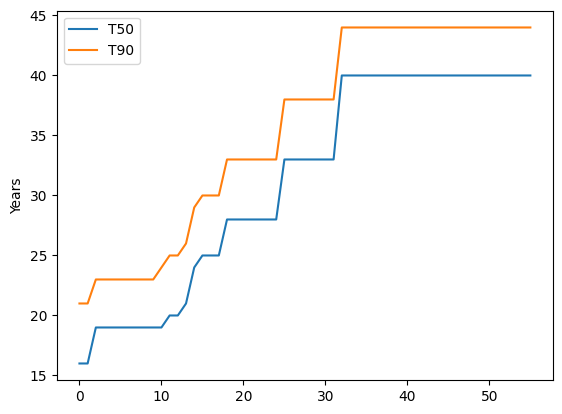

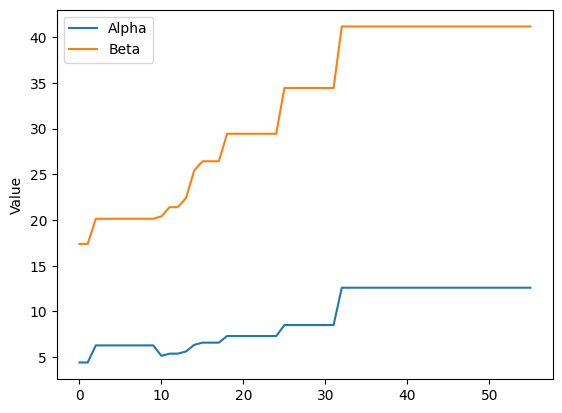

In [7]:
# Plotting T50 and T90
plt.plot(r1.scenario['standard'].dataIn_m.mod_reliability_t50)
plt.plot(r1.scenario['standard'].dataIn_m.mod_reliability_t90)
plt.ylabel('Years')
plt.legend(['T50', 'T90'])

# Making a dataframe of the list of dictionary values for alpha and beta
foo = r1.scenario['standard'].dataOut_m.WeibullParams
foo = pd.DataFrame.from_records(foo)

# Plotting Alpha and Beta
plt.figure()
plt.plot(foo)
plt.ylabel('Value')
plt.legend(['Alpha', 'Beta']);

# Plotting CDFs with Helper Function

Using ``PV_ICE.weibull_cdf_vis`` to plot different values of alpha and beta, some calculated from t50 and t90 and some passed from literature values.



In [8]:
firstgen = r1.scenario['standard'].dataOut_m.WeibullParams.iloc[0]
ares = PV_ICE.weibull_cdf_vis(firstgen['alpha'],firstgen['beta'])

twentythirtygen = firstgen = r1.scenario['standard'].dataOut_m.WeibullParams.iloc[35]
bres = PV_ICE.weibull_cdf_vis(twentythirtygen['alpha'],twentythirtygen['beta'])

#userWeibulls = {'alpha': 3.4,
#               'beta': 4.5}
#userres = PV_ICE.weibull_cdf_vis(userWeibulls['alpha'],userWeibulls['beta'])

# Irena 'EL' 2016
alpha = 2.4928
Lifetime = 30
IrenaEarly = PV_ICE.weibull_cdf_vis(alpha, beta=Lifetime)

# Irena 'RL' 2016
alpha = 5.3759
Lifetime = 30
IrenaReg = PV_ICE.weibull_cdf_vis(alpha, beta=Lifetime)

# Upper Shape Factor Kumar 2013
alpha = 14.41
Lifetime = 30
Kumar = PV_ICE.weibull_cdf_vis(alpha, beta=Lifetime)


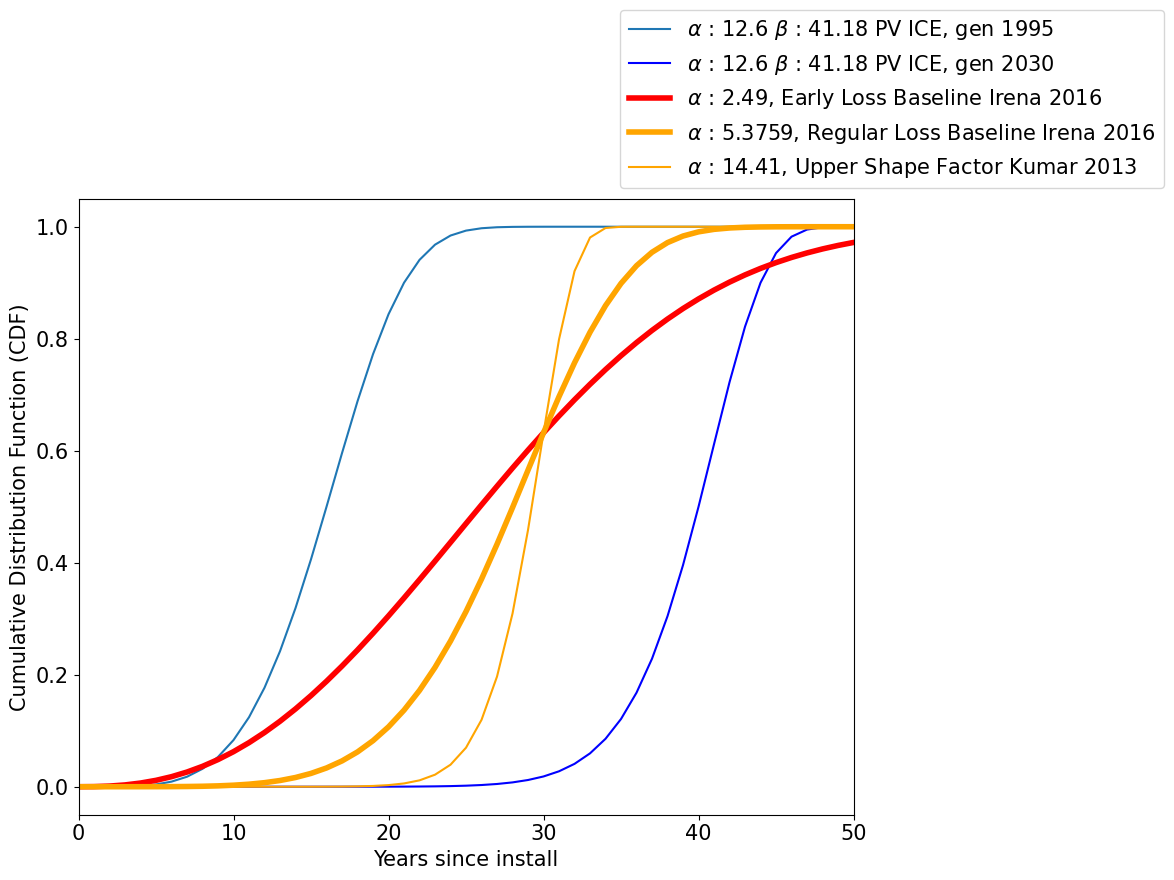

In [9]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 8)
    
plt.plot(ares, label=r'$ \alpha $ : '+str(round(firstgen['alpha'],2))+ r' $ \beta $ : '+ str(round(firstgen['beta'],2)) + ' PV ICE, gen 1995')
plt.plot(bres, color='b', label=r'$ \alpha $ : '+str(round(twentythirtygen['alpha'],2))+ r' $ \beta $ : '+ str(round(twentythirtygen['beta'],2)) + ' PV ICE, gen 2030')
plt.plot(IrenaEarly, color='red', linewidth=4.0, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
plt.plot(IrenaReg, color='orange', linewidth=4.0, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
plt.plot(Kumar, '-', color='orange', label=r'$ \alpha $ : 14.41, Upper Shape Factor Kumar 2013')
plt.legend()
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='lower center');


## Calculating 'alpha' and 'beta' from t50 and t90 

Using ``PV_ICe.weibull_params`` to calculate alpha and beta values for t50 and t90. This is done internally usually but this is an example of directly accesing that function

In [10]:
t50 = 25
t90 = 35

weibullIParams = PV_ICE.weibull_params({t50: 0.50, t90: 0.90})    
print(weibullIParams)

{'alpha': 3.568036928946225, 'beta': 27.704559230401895}


Here's a plot showing the relationship between the t50 and t90 and how our Weibull looks like.

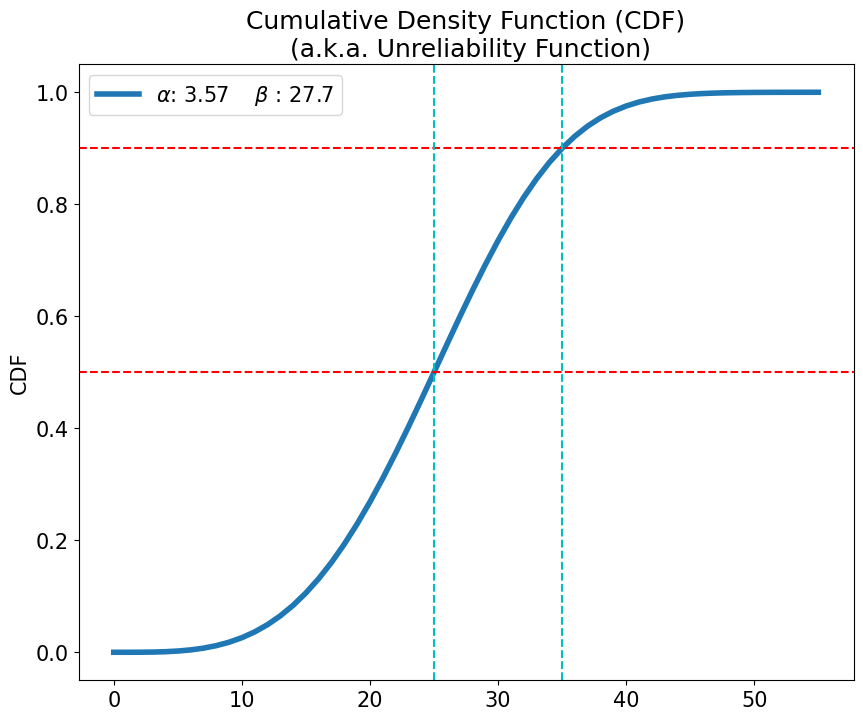

In [11]:
calc_cdf = PV_ICE.weibull_cdf_vis(weibullIParams['alpha'], weibullIParams['beta'])
mylabel = r'$ \alpha $: '+str(round(weibullIParams['alpha'],2))+ r'    $ \beta $ : '+ str(round(weibullIParams['beta'],2))
plt.plot(calc_cdf, linewidth=4.0, label=mylabel)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=25, color='c', linestyle='--')
plt.axvline(x=t90, color='c', linestyle='--')
#plt.axhline(y=0.1, color='r', linestyle='--')
plt.ylabel("CDF")
plt.title('Cumulative Density Function (CDF)\n (a.k.a. Unreliability Function)')

plt.legend();

# Reliability 101: Relationship between CDF, PDF, Reliability and Failure Rate

Calculating all of these for a Weibull PDF with Irena Regular Loss Values, of alpha: 5.3759 and beta:30

In [12]:
weibullIParams = {'alpha': 5.3759,
                      'beta': 30}

In [13]:
# Changing size for slide presentation of these results
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

### Calculating CDF with PV ICE 

In [14]:
calc_cdf = PV_ICE.weibull_cdf_vis(weibullIParams['alpha'], weibullIParams['beta'])


### PDF f(t) is the difference between every value of the CDF

In [15]:
calc_pdf = np.diff(calc_cdf)

### Reliability Function R(t) is the "Complement" of the CDF

In [16]:
reliability_function = [1 - x for x in calc_cdf]

### Failure Rate is the ratio of the PDF to the Reliability function (f(t)/R(t))

In [17]:
failure_rate = calc_pdf / reliability_function[:-1]

### Plotting each of the Functions

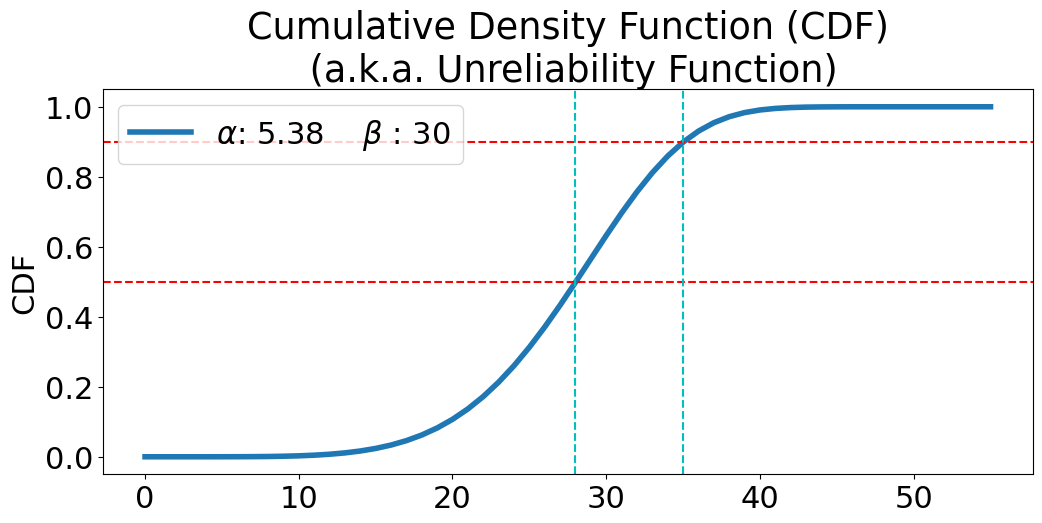

In [18]:
mylabel = r'$ \alpha $: '+str(round(weibullIParams['alpha'],2))+ r'    $ \beta $ : '+ str(round(weibullIParams['beta'],2))
plt.plot(calc_cdf, linewidth=4.0, label=mylabel)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=28, color='c', linestyle='--')
plt.axvline(x=t90, color='c', linestyle='--')
#plt.axhline(y=0.1, color='r', linestyle='--')
plt.ylabel("CDF")
plt.title('Cumulative Density Function (CDF)\n (a.k.a. Unreliability Function)')

plt.legend();

Text(0.5, 1.0, 'Failure Rate')

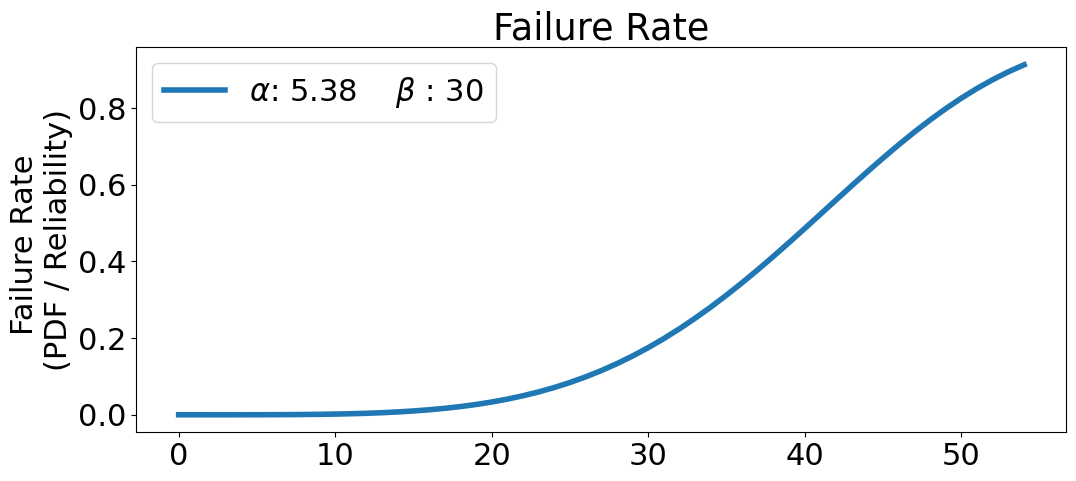

In [19]:
mylabel = r'$ \alpha $: '+str(round(weibullIParams['alpha'],2))+ r'    $ \beta $ : '+ str(round(weibullIParams['beta'],2))
plt.plot(failure_rate, linewidth=4.0, label=mylabel)

plt.legend();

plt.ylabel("Failure Rate \n(PDF / Reliability)")
plt.title('Failure Rate')

#plt.axhline(y=0.1, color='r', linestyle='--')
#plt.axhline(y=0.5, color='r', linestyle='--')
#plt.axvline(x=28, color='c', linestyle='--')
#plt.axvline(x=t90, color='c', linestyle='--')
#plt.axhline(y=0.1, color='r', linestyle='--')

Text(0.5, 1.0, 'Reliability Function \na.k.a. Survival Plot')

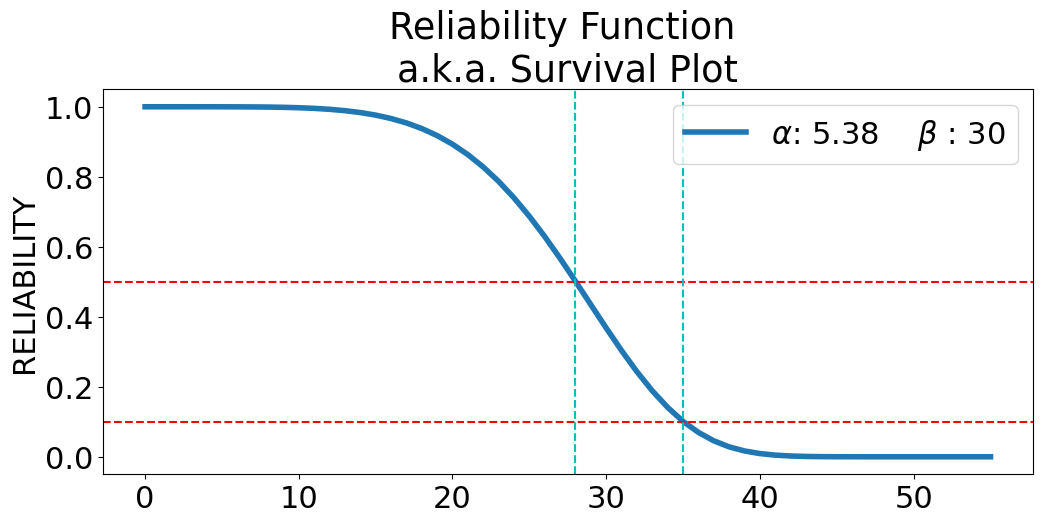

In [20]:
mylabel = r'$ \alpha $: '+str(round(weibullIParams['alpha'],2))+ r'    $ \beta $ : '+ str(round(weibullIParams['beta'],2))
plt.plot(reliability_function, linewidth=4.0, label=mylabel)

plt.legend();
plt.axhline(y=0.1, color='r', linestyle='--')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=28, color='c', linestyle='--')
plt.axvline(x=t90, color='c', linestyle='--')
#plt.axhline(y=0.1, color='r', linestyle='--')
plt.ylabel("RELIABILITY")
plt.title('Reliability Function \na.k.a. Survival Plot')


Text(0, 0.5, 'DENSITY')

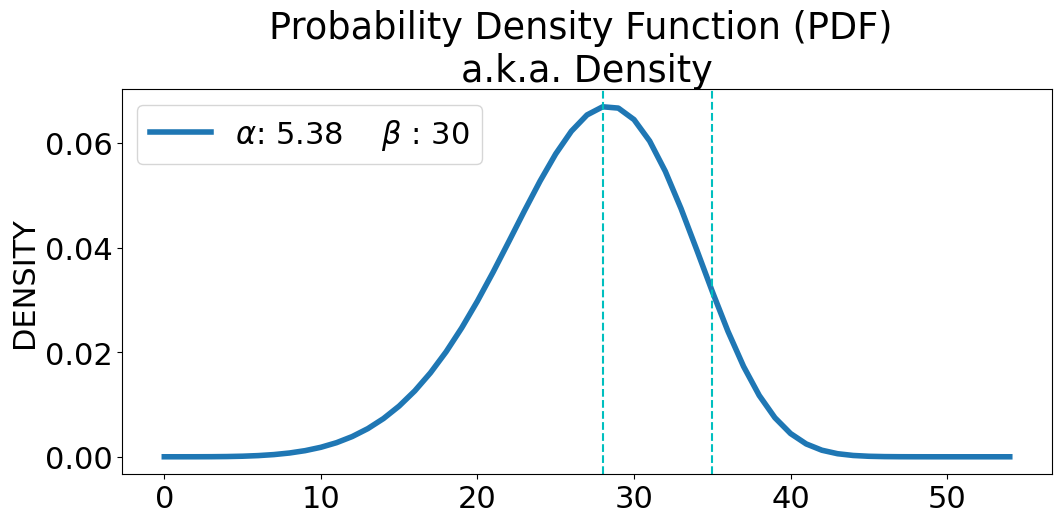

In [21]:
mylabel = r'$ \alpha $: '+str(round(weibullIParams['alpha'],2))+ r'    $ \beta $ : '+ str(round(weibullIParams['beta'],2))
plt.plot(calc_pdf, linewidth=4.0, label=mylabel)

plt.legend();
#plt.axhline(y=0.9, color='r', linestyle='--')
#plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=28, color='c', linestyle='--')
plt.axvline(x=t90, color='c', linestyle='--')
#plt.axhline(y=0.1, color='r', linestyle='--')
plt.title('Probability Density Function (PDF) \na.k.a. Density')
plt.ylabel("DENSITY")
